# A.02 Chebyshev's Theorem

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

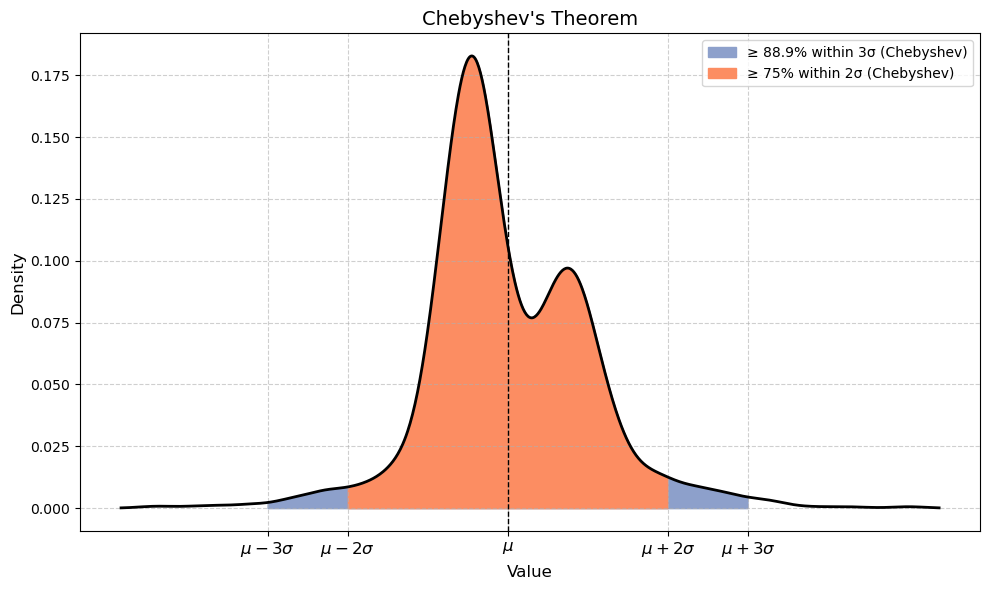

In [2]:
# Create bimodal data
np.random.seed(42)                                  
data_left  = np.random.normal(loc=-2, scale=1, size=1500)  
data_middle = np.random.normal(loc= 0, scale=5, size=1000)
data_right = np.random.normal(loc= 2, scale=1, size= 700)  
data3 = np.concatenate([data_left, data_right, data_middle])

# Mean and standard deviation (population-like)
mu  = data3.mean()
std = data3.std(ddof=0)

# Grid for smooth density via KDE
x = np.linspace(data3.min()-1.0, data3.max()+1.0, 1000)
kde = gaussian_kde(data3, bw_method='scott')
y = kde(x)

# Colors (keep consistent between legend and plot)
c2s  = "#fc8d62"   # Orange → region within 2σ (Chebyshev ≥ 75%)
c3s  = "#8da0cb"   # Blue   → region within 3σ (Chebyshev ≥ 88.9%)

plt.figure(figsize=(10, 6))

# Plot the empirical density curve (non-normal, bimodal)
plt.plot(x, y, color="black", linewidth=2)  # Density curve from data

# Draw from OUTSIDE -> INSIDE with solid colors (no alpha) to avoid mixing
# 3σ region: [mu-3σ, mu+3σ]
plt.fill_between(x, y, where=(x >= mu-3*std) & (x <= mu+3*std), color=c3s, label="≥ 88.9% within 3σ (Chebyshev)")
# 2σ inner region on top: [mu-2σ, mu+2σ]
plt.fill_between(x, y, where=(x >= mu-2*std) & (x <= mu+2*std), color=c2s, label="≥ 75% within 2σ (Chebyshev)")

# Vertical line at mean
plt.axvline(mu, color="black", linestyle="--", linewidth=1)

# Compute actual proportions from the data (to compare with Chebyshev's bounds)
p2 = np.mean((data3 >= mu-2*std) & (data3 <= mu+2*std))
p3 = np.mean((data3 >= mu-3*std) & (data3 <= mu+3*std))

# Axis, ticks, and labels (μ − 3σ, μ − 2σ, μ, μ + 2σ, μ + 3σ)
tick_positions = [mu - 3*std, mu - 2*std, mu, mu + 2*std, mu + 3*std]
tick_labels = [r"$\mu - 3\sigma$", r"$\mu - 2\sigma$", r"$\mu$", r"$\mu + 2\sigma$", r"$\mu + 3\sigma$"]
plt.xticks(tick_positions, tick_labels, fontsize=12)

# Titles and axes
plt.title("Chebyshev's Theorem", fontsize=14)
plt.xlabel("Value", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)

# Legend with both guarantees and empirical proportions
plt.legend(loc=1)

plt.tight_layout()

# Save figure
plt.savefig('images/chp1_chebyshev.png', dpi=300)
plt.show()